# Regressão 01 - tarefa 02 - transformações em X e Y

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.52e-06
Time:                        14:23:36   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

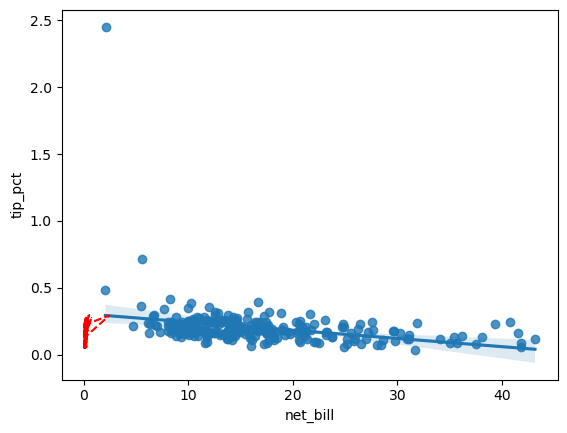

In [3]:
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)
#sumário
print(reg1.summary())
plt.plot(tips['tip_pct'], reg1.fittedvalues, 'r,--')

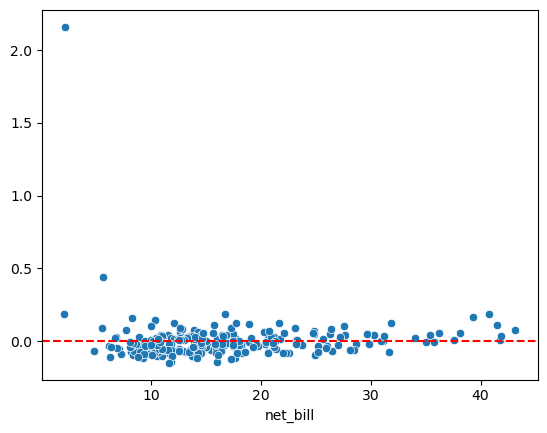

In [4]:
sns.scatterplot(x = 'net_bill', y = reg1.resid, data = tips) # 
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.62e-13
Time:                        14:25:48   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

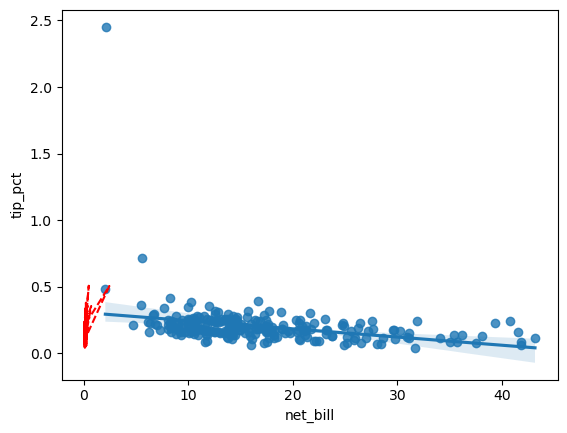

In [5]:
reg2 = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()

# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)
#sumário
print(reg2.summary()) # R² melhorou significamente na utilização do log,mas não o suficiente
plt.plot(tips['tip_pct'], reg2.fittedvalues, 'r,--')

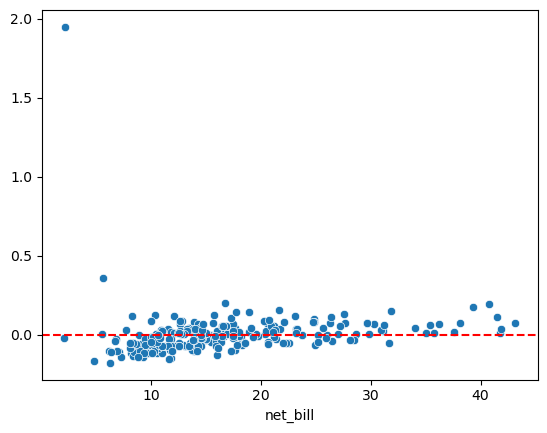

In [6]:
sns.scatterplot(x = 'net_bill', y = reg2.resid, data = tips) # 
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           0.000297
Time:                        14:27:19   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

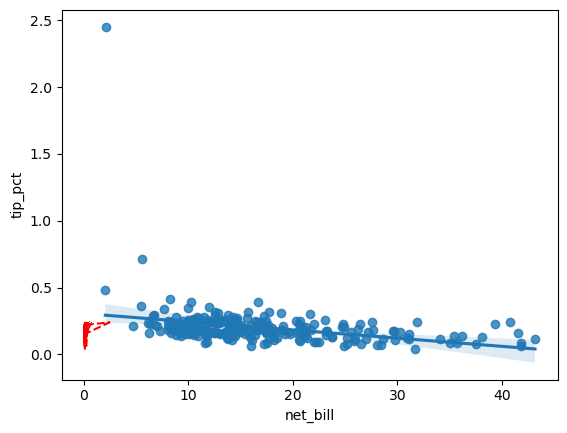

In [7]:
reg3 = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips).fit()

# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)
#sumário
print(reg3.summary())
plt.plot(tips['tip_pct'], reg3.fittedvalues, 'r,--')

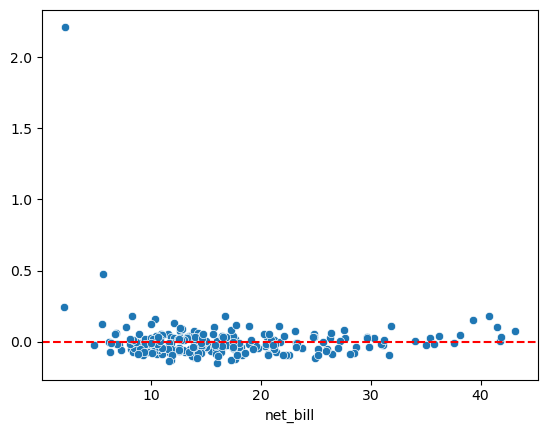

In [8]:
sns.scatterplot(x = 'net_bill', y = reg3.resid, data = tips) # 
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

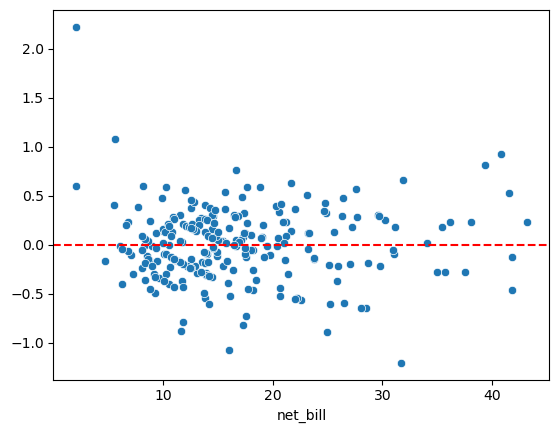

In [9]:
reg4 = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()

# Gráfico de dispersão
sns.scatterplot(x = 'net_bill', y = reg4.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
tips['pred_log'] = np.exp(reg4.fittedvalues)

In [11]:
tips[['pred_log','tip_pct']].corr().iloc[0,1] # R² de np.log(tip_pct)

0.33824530436548217

In [12]:
tips['pred_pct'] = reg4.fittedvalues

In [13]:
tips[['pred_pct','tip_pct']].corr().iloc[0,1] # R² de tip_pct

0.30214375586238695

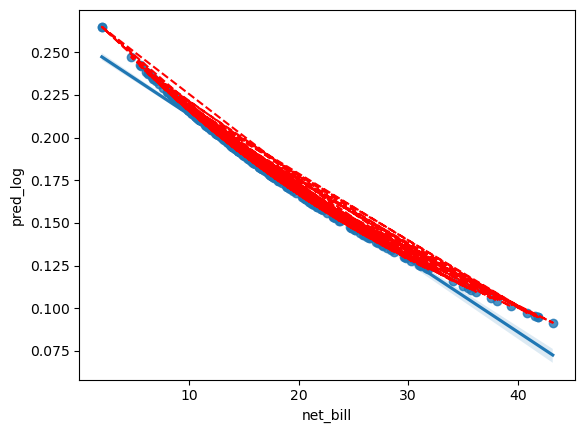

In [14]:
sns.regplot(x = 'net_bill', y = tips['pred_log'], data = tips)
plt.plot(tips['net_bill'], np.exp(reg4.fittedvalues), 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

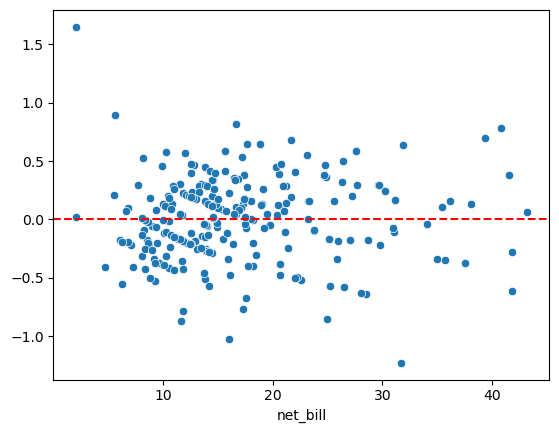

In [15]:
reg5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
sns.scatterplot(x = 'net_bill', y = reg5.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
tips['pred_log2'] = np.exp(reg5.fittedvalues)
tips['pred_pct2'] = reg5.fittedvalues

In [17]:
tips[['pred_log2','tip_pct']].corr().iloc[0,1]  #R² de np.log(tip_pct)

0.5558315818692049

In [18]:
tips[['pred_pct2','tip_pct']].corr().iloc[0,1] # R² de tip_pct

0.4491423408854422

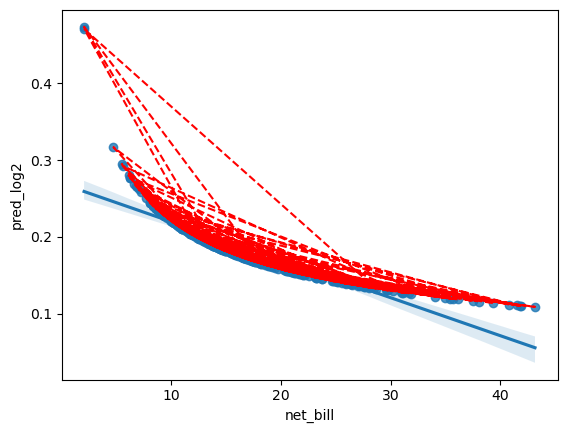

In [19]:
sns.regplot(x = 'net_bill', y = tips['pred_log2'], data = tips)
plt.plot(tips['net_bill'], tips['pred_log2'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

O modelo do item 5 ('np.log(tip_pct) ~ np.log(net_bill)') resultou no modelo com maior R2, que no caso seria o melhor modelo.

